In [1]:
#importamos librerias
import pandas as pd    # Librería para tablas y tratamiento de datos.
#Para una visualización completa de todas las columnas:
pd.set_option('display.max_columns', None)
#Accedemos a las funciones en soporte_dts de la carpeta src
from src import soporte_dts as sdts
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_ventas_prod_client=sdts.leer_datos('csv_limpios_finales/clientes_productos_ventas_limpio.csv')
df_clientes=sdts.leer_datos('csv_iniciales/clientes.csv')
df_metricas=sdts.leer_datos('csv_limpios_finales/metricas_cliente.csv')
df_productos=sdts.leer_datos('csv_iniciales/productos.csv')

Los csv iniciales de clientes y productos, no presentan duplicados y se encuentran limpios,. Paras la informaciín que sacaremos de ellos.

## INFORMACION CLIENTES

In [3]:
#Obtenemos el numero de clientes:
print(f'Numero de clientes registrados es:{df_clientes.shape[0]}')
#Obtenemos el numero de clientes distintos que han efectuado alguna compra:


Numero de clientes registrados es:300


In [4]:
#revisamos el numero de filas:
data=[df_ventas_prod_client,df_productos,df_clientes,df_metricas]
nombre=['ventas','productos','clientes','metricas']
for i in range(0,len(nombre)):
        sdts.numero_filas(data[i],nombre[i])

Numero de filas de df ventas: 79920 filas
Numero de filas de df productos: 600 filas
Numero de filas de df clientes: 300 filas
Numero de filas de df metricas: 210 filas


In [7]:
numero_clientes_ventas=df_ventas_prod_client['id_cliente'].nunique()
print('Id_clientes distintos que han realizado alguna transacción:', numero_clientes_ventas)

Id_clientes distintos que han realizado alguna transacción: 210


In [9]:
print(f'Porcentaje de clientes registrados que han realizado alguna compra o transacción es de {numero_clientes_ventas/df_clientes.shape[0]*100} %')

Porcentaje de clientes registrados que han realizado alguna compra o transacción es de 70.0 %


In [ ]:
#Creamos un df que indique si un cliente s activo( ha realizado alguna compra o no)
df_actividad_clientes=df_metricas.merge(right=df_clientes, how='right',on='id_cliente')[['id_cliente','primera_compra']]
df_actividad_clientes['actividad']=df_actividad_clientes['primera_compra'].apply(lambda x: 'No' if pd.isna(x) else 'yes')

In [25]:
df_actividad_clientes.sample(10)

,id_cliente,primera_compra,actividad
193,C0194,2020-01-09,yes
275,C0276,2020-01-14,yes
264,C0265,2020-02-02,yes
29,C0030,2020-02-11,yes
180,C0181,2020-01-25,yes
234,C0235,NaN,No
123,C0124,2020-01-02,yes
220,C0221,2020-02-16,yes
197,C0198,2020-01-29,yes
39,C0040,NaN,No


In [31]:
df_actividad_agrupado=df_actividad_clientes.groupby('actividad')['id_cliente'].count().reset_index()

In [32]:
df_actividad_agrupado

,actividad,id_cliente
0,No,90
1,yes,210


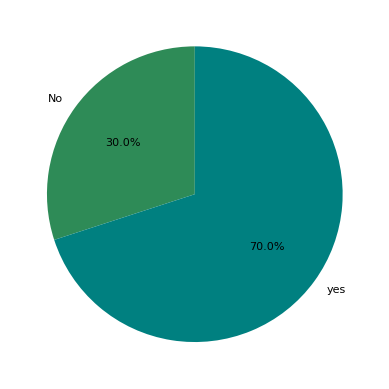

In [35]:
colores=["seagreen","teal"]
plt.pie('id_cliente', labels='actividad',
        data=df_actividad_agrupado,
        autopct='%1.1f%%',
        colors=colores,
        textprops={'fontsize':8},
        startangle=90);

El 30% de losa clientes registrados no ha relizado ninguna compra.
Sacamos aquellos registros de clientes que no han realizado compra para acciones de MKT:
-¿Por qué no han realizado ninguna compra?